In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

In [2]:
df = pd.read_csv("movies.csv",encoding ='latin-1')

In [3]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [5]:
df.describe(include="object").T

,count,unique,top,freq
title,10329,10327,War of the Worlds (2005),2
genres,10329,938,Drama,1385


In [6]:
df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

<AxesSubplot:>

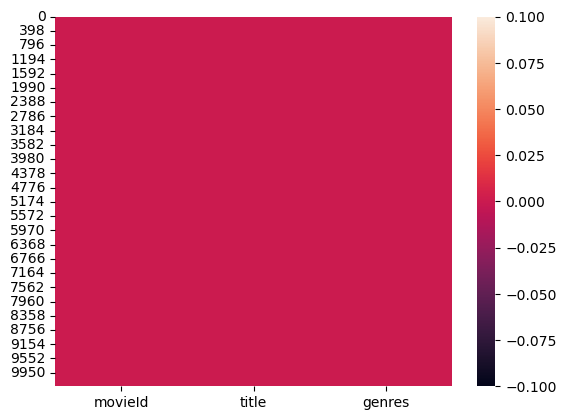

In [7]:
sns.heatmap(df.isnull())

In [8]:
df1 = pd.read_csv("ratings.csv",encoding ='latin-1')

In [9]:
df1.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [11]:
df1.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

<AxesSubplot:>

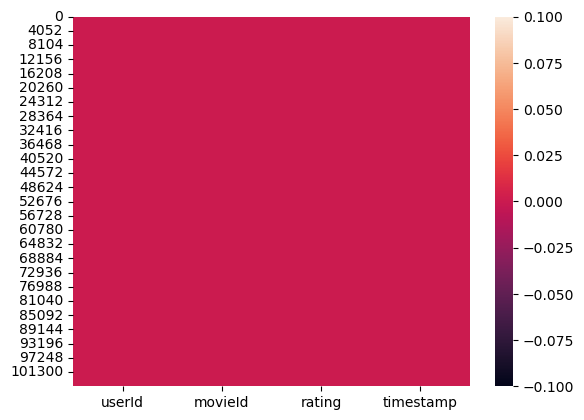

In [12]:
sns.heatmap(df1.isnull())

In [13]:
new_df = pd.merge(df,df1, how='left',on='movieId')

new_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1.303501e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,8.586109e+08
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,8.508158e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,8.517663e+08
...,...,...,...,...,...,...
105338,148238,A Very Murray Christmas (2015),Comedy,475.0,3.0,1.451213e+09
105339,148626,The Big Short (2015),Drama,458.0,4.0,1.452015e+09
105340,148626,The Big Short (2015),Drama,576.0,4.5,1.451688e+09
105341,148626,The Big Short (2015),Drama,668.0,4.5,1.451148e+09


In [14]:
upper_limit=new_df["rating"].mean() + 3*new_df["rating"].std()
lower_limit=new_df["rating"].mean() - 3*new_df["rating"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  6.6514668970668716
lower limit:  0.38223382156535335


In [15]:
#find the outliers
outliers_df=new_df.loc[(new_df["rating"]> upper_limit) |(new_df["rating"] < lower_limit)]
outliers_df.shape

(0, 6)

In [16]:
#remove outliers from the data
dataframe =new_df.loc[(new_df["rating"]< upper_limit) & (new_df["rating"] > lower_limit)]

print("the outliers: ",len(new_df)-len(dataframe))

the outliers:  4


In [17]:
output_file = "movie_recommendation.csv"
dataframe.to_csv(output_file,index=False)

In [18]:
new = pd.read_csv("movie_recommendation.csv")
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    105339 non-null  int64  
 1   title      105339 non-null  object 
 2   genres     105339 non-null  object 
 3   userId     105339 non-null  float64
 4   rating     105339 non-null  float64
 5   timestamp  105339 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ MB


In [19]:
top_10_movies = new.loc[new['rating'].sort_values(ascending=False)[:10].index]
top_10_movies

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08
16811,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical,109.0,5.0,9.186412e+08
16825,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical,228.0,5.0,1.124122e+09
51209,2396,Shakespeare in Love (1998),Comedy|Drama|Romance,198.0,5.0,9.586871e+08
16821,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical,179.0,5.0,1.056440e+09
16818,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical,144.0,5.0,1.242185e+09
51205,2396,Shakespeare in Love (1998),Comedy|Drama|Romance,173.0,5.0,9.545975e+08
75087,5014,I Am Sam (2001),Drama,209.0,5.0,1.013140e+09
16812,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical,110.0,5.0,9.922512e+08
16810,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical,108.0,5.0,9.449649e+08


In [20]:
new[['title','release_year']] =new['title'].str.extract(r'([^\(]+)\s*\((\d{4})\)')
new.head()

,movieId,title,genres,userId,rating,timestamp,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1.303501e+09,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,8.586109e+08,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,8.508158e+08,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,8.517663e+08,1995


In [21]:
result =new.loc[new.groupby('release_year')['rating'].idxmax()]
result = result.sort_values(by=['release_year','rating'],ascending = False)

result

,movieId,title,genres,userId,rating,timestamp,release_year
104776,115713,Ex Machina,Drama|Sci-Fi|Thriller,114.0,5.0,1.452131e+09,2015
104079,108190,Divergent,Adventure|Romance|Sci-Fi|IMAX,664.0,5.0,1.423497e+09,2014
103210,99728,Gangster Squad,Action|Crime|Drama,164.0,5.0,1.440812e+09,2013
101761,89745,"Avengers, The",Action|Adventure|Sci-Fi|IMAX,78.0,5.0,1.422654e+09,2012
100879,84152,Limitless,Sci-Fi|Thriller,599.0,5.0,1.424813e+09,2011
...,...,...,...,...,...,...,...
62992,3310,"Kid, The",Comedy|Drama,265.0,5.0,9.747367e+08,1921
82568,6987,"Cabinet des Dr. Caligari., Das)",Crime|Fantasy|Horror,15.0,5.0,1.447479e+09,1920
82582,6988,Broken Blossoms or The Yellow Man and the Girl,Drama|Romance,668.0,3.5,1.419449e+09,1919
82874,7065,"Birth of a Nation, The",Drama|War,213.0,3.5,1.111503e+09,1915


In [22]:
result =new.groupby('release_year')['title'].count().reset_index(name='num_of_movies')
result = result.sort_values(by='num_of_movies',ascending=False)
result

,release_year,num_of_movies
78,1995,6730
77,1994,5874
79,1996,5782
82,1999,4894
76,1993,4494
...,...,...
4,1921,8
6,1923,6
1,1915,3
2,1919,2


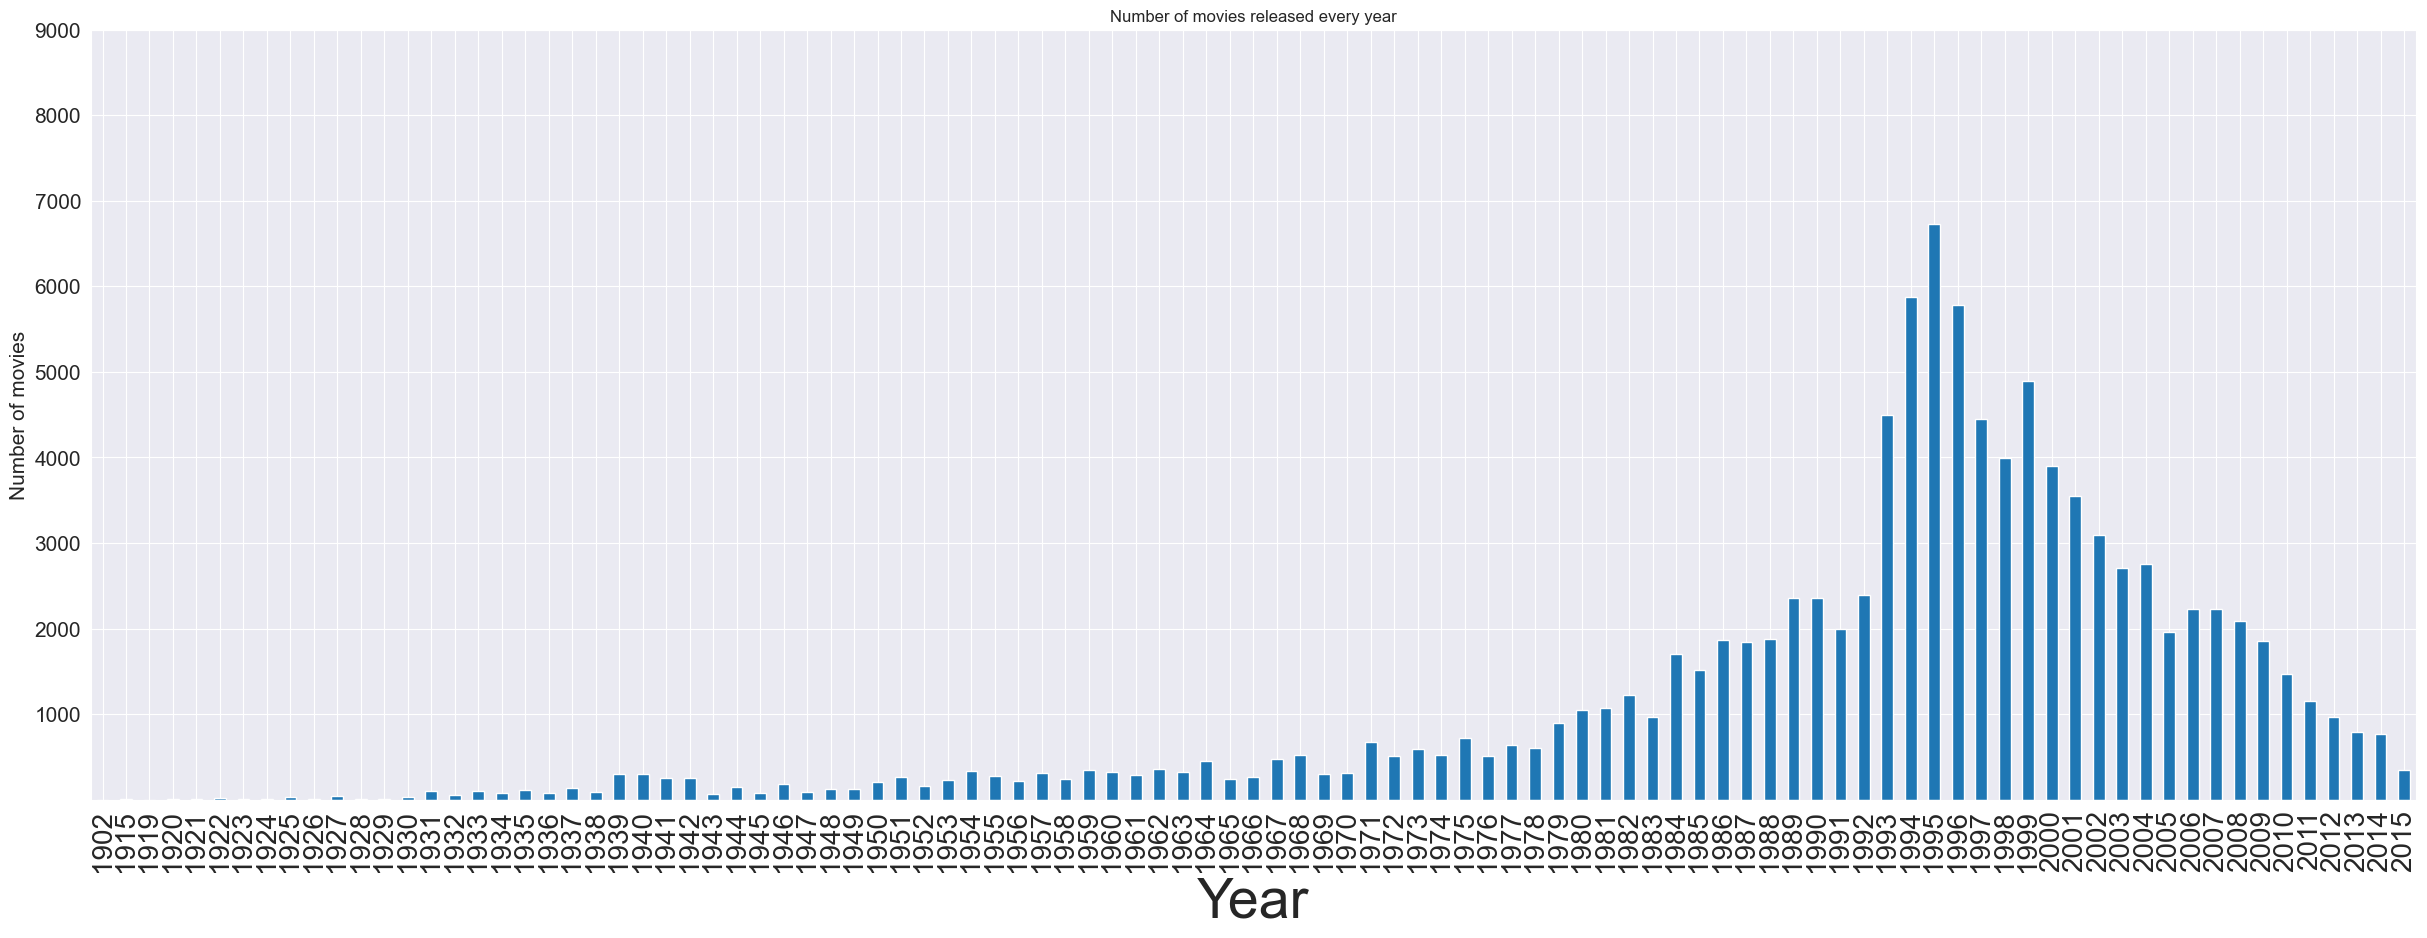

In [23]:
sns.set_style('darkgrid')
result = new.groupby(['release_year'])['title'].count()
plt.figure(figsize=(30,10))
result.plot(kind='bar')
plt.xlabel('Year',fontsize =40 )
plt.yticks(np.arange(1000,10000,1000),fontsize=15)
plt.xticks(rotation = 90,fontsize=20)
plt.ylabel('Number of movies',size=15)
plt.title('Number of movies released every year')

plt.show()

In [24]:
genre_df = pd.DataFrame({'Genre':new['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('Genre')})
genre_counts = genre_df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre','num_of_movies']
genre_counts






,Genre,num_of_movies
0,Drama,46960
1,Comedy,38055
2,Action,31205
3,Thriller,29288
4,Adventure,23076
5,Romance,19094
6,Crime,18291
7,Sci-Fi,16795
8,Fantasy,10889
9,Mystery,8320


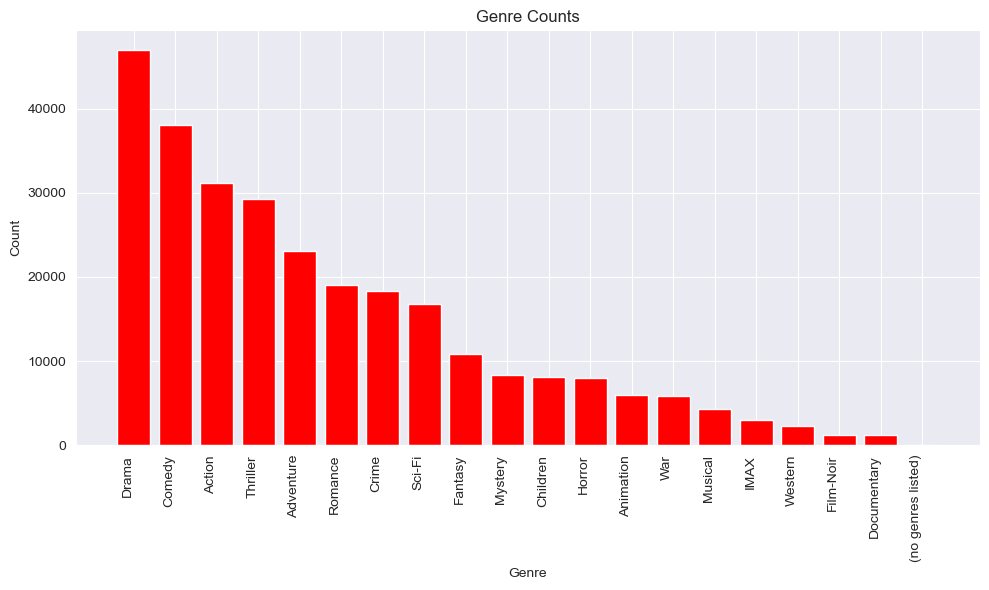

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(genre_counts['Genre'], genre_counts['num_of_movies'], color='red')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Counts')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()


plt.show()

In [26]:
genres=[]
for genre in new.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in df.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)


In [27]:
from wordcloud import WordCloud
from random import choice
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(title)

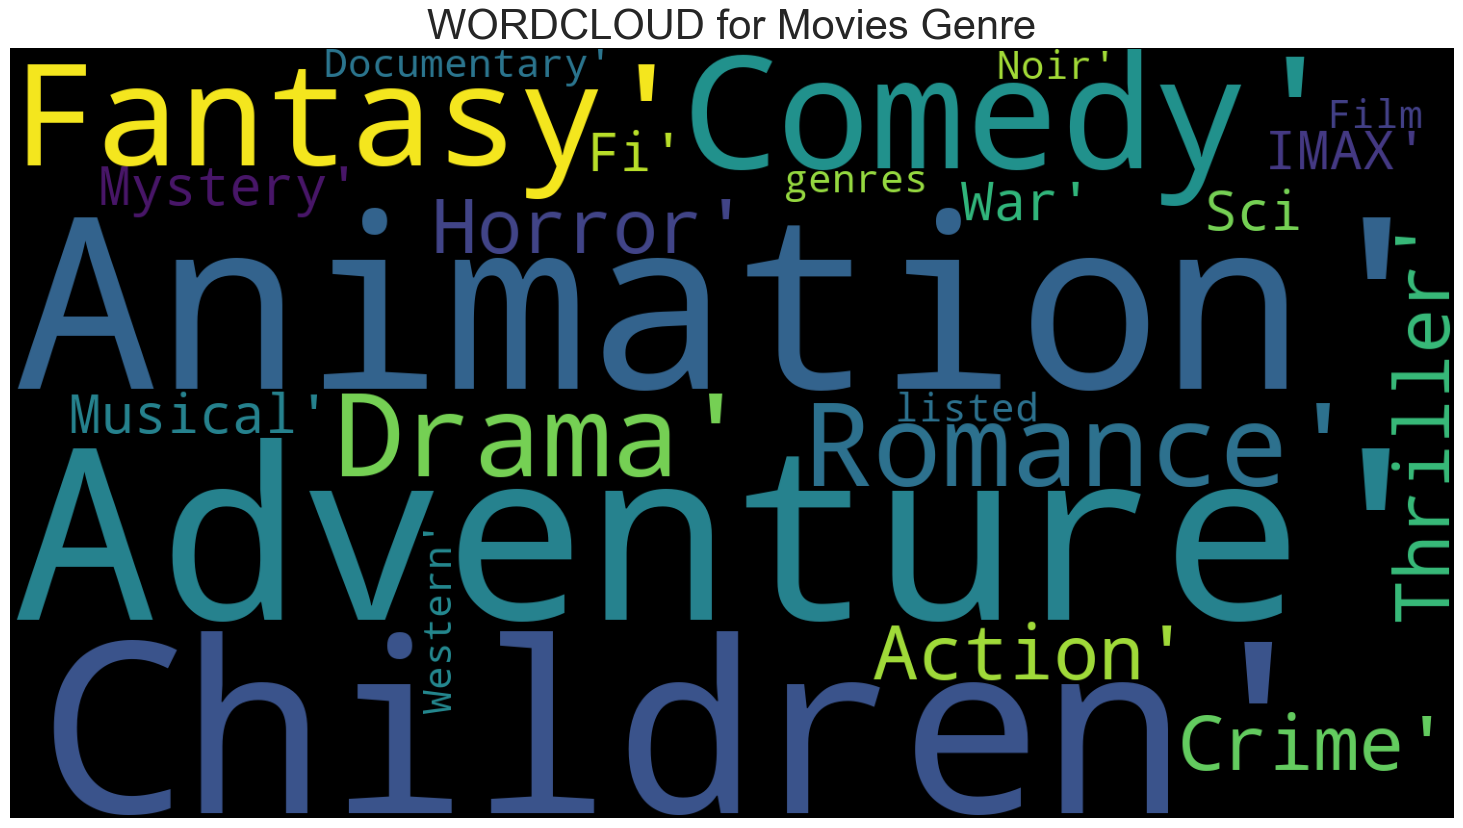

In [28]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [30]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(df['genres'])

In [31]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [32]:
indices=pd.Series(df.index,index=df['title'])
titles=df['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [33]:
recommendations('Toy Story (1995)')

1815                                           Antz (1998)
2496                                    Toy Story 2 (1999)
2967        Adventures of Rocky and Bullwinkle, The (2000)
3166                      Emperor's New Groove, The (2000)
3811                                 Monsters, Inc. (2001)
6617     DuckTales: The Movie - Treasure of the Lost La...
6997                                      Wild, The (2006)
7382                                Shrek the Third (2007)
7987                        Tale of Despereaux, The (2008)
9215     Asterix and the Vikings (AstÃ©rix et les Vikin...
9732                                          Turbo (2013)
10052                                Boxtrolls, The (2014)
1595                            Black Cauldron, The (1985)
1675                         Lord of the Rings, The (1978)
2696                 We're Back! A Dinosaur's Story (1993)
3420                      Atlantis: The Lost Empire (2001)
3535                          Land Before Time, The (198

In [34]:


genres_list = df['genres'].apply(lambda x: x.split('|') if pd.notna(x) else []).tolist()


genres_strings = [' '.join(genres) for genres in genres_list]

genres_strings



['Adventure Animation Children Comedy Fantasy',
 'Adventure Children Fantasy',
 'Comedy Romance',
 'Comedy Drama Romance',
 'Comedy',
 'Action Crime Thriller',
 'Comedy Romance',
 'Adventure Children',
 'Action',
 'Action Adventure Thriller',
 'Comedy Drama Romance',
 'Comedy Horror',
 'Adventure Animation Children',
 'Drama',
 'Action Adventure Romance',
 'Crime Drama',
 'Drama Romance',
 'Comedy',
 'Comedy',
 'Action Comedy Crime Drama Thriller',
 'Comedy Crime Thriller',
 'Crime Drama Horror Mystery Thriller',
 'Action Crime Thriller',
 'Drama Sci-Fi',
 'Drama Romance',
 'Drama',
 'Children Drama',
 'Drama Romance',
 'Adventure Drama Fantasy Mystery Sci-Fi',
 'Crime Drama',
 'Drama',
 'Mystery Sci-Fi Thriller',
 'Adventure Romance IMAX',
 'Children Drama',
 'Drama Romance',
 'Crime Drama',
 'Comedy Romance',
 'Drama',
 'Drama War',
 'Action Crime Drama',
 'Drama',
 'Action Adventure Fantasy',
 'Comedy Drama Thriller',
 'Drama Romance',
 'Mystery Thriller',
 'Animation Children Drama

In [36]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['genres'])

# Convert the TF-IDF matrix to a sparse matrix
tfidf_matrix_sparse = tfidf_matrix.tocsr()

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix_sparse, tfidf_matrix_sparse)



In [37]:
def get_genre_recommendations(title):
    idx = next((i for i, movie in enumerate(df['title']) if movie == title), None)
    if idx is None:
        return []

    # Get the pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 5 recommendations
    top_movies = sim_scores[1:6]

    # Return the genres of recommended movies
    recommended_genres = [genres_list[i[0]] for i in top_movies]

    return recommended_genres

In [38]:
# Example usage
movie_title = 'Grumpier Old Men (1995)'
genre_recommendations = get_genre_recommendations(movie_title)
print(f"Genre Recommendations for {movie_title}: {genre_recommendations}")


Genre Recommendations for Grumpier Old Men (1995): [['Comedy', 'Romance'], ['Comedy', 'Romance'], ['Comedy', 'Romance'], ['Comedy', 'Romance'], ['Comedy', 'Romance']]


In [39]:
cv1=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(df['genres'])

In [40]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [41]:
# Function to get movie recommendations
def recommendations(movie_id):
    try:
        idx = indices[int(movie_id)]
    except KeyError:
        return f"Movie ID {movie_id} not found."

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]  # Adjust as needed
    movie_indices = [i[0] for i in sim_scores]

    recommended_movies = df['title'].iloc[movie_indices].tolist()
    
    return recommended_movies



In [42]:
df.tail()

,movieId,title,genres
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed)


In [44]:
# Example usage
movie_id = '10324'
recommended_movies = recommendations(movie_id)
print(f"Recommendations for Movie ID {movie_id}:\n{recommended_movies}")



Recommendations for Movie ID 10324:
['Rugrats Movie, The (1998)', 'Saludos Amigos (1943)', 'Chicken Run (2000)', 'Rugrats in Paris: The Movie (2000)', 'Looney, Looney, Looney Bugs Bunny Movie, The (1981)', 'Garfield: The Movie (2004)', 'Shark Tale (2004)', "Bebe's Kids (1992)", 'Charlie Brown Christmas, A (1965)', 'Hoodwinked! (2005)', 'Cars (2006)', "Happily N'Ever After (2007)", "Surf's Up (2007)", "It's the Great Pumpkin, Charlie Brown (1966)", 'Bugs Bunny / Road Runner Movie, The (a.k.a. The Great American Chase) (1979)', 'Hop (2011)', 'Smurfs, The (2011)', 'For the Birds (2000)', 'Hotel Transylvania (2012)', 'Inside Out (2015)']
